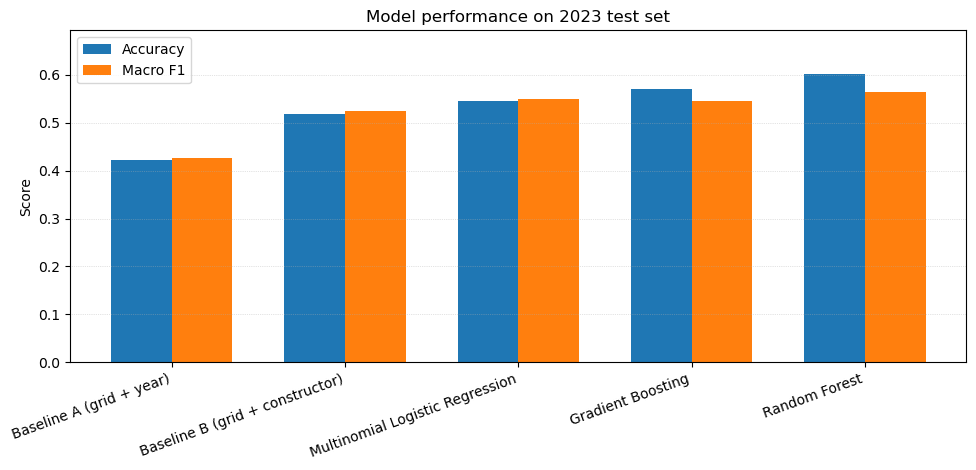

Saved: ../figures/fig_1_model_performance_2023.png
Saved: ../figures/fig_1_model_performance_2023.pdf


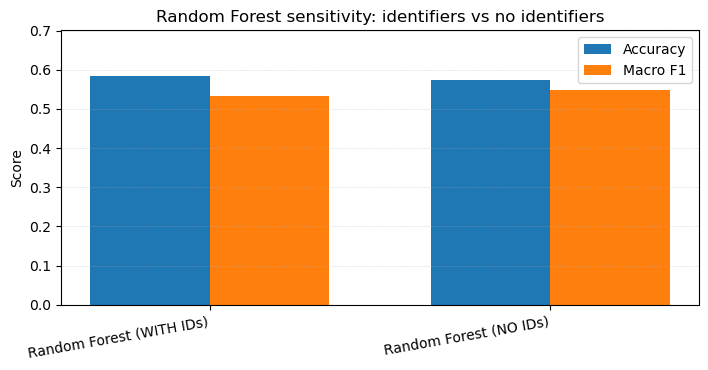

Saved: ../figures/fig_2_ids_vs_noids_2023.png
Saved: ../figures/fig_2_ids_vs_noids_2023.pdf


In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------- Paths ----------
ROOT = Path("..")  # notebook/ -> project root
RESULTS = ROOT / "results"
FIGDIR = ROOT / "figures"
FIGDIR.mkdir(exist_ok=True)

BASELINES_CSV = RESULTS / "train_baselines_results_2023.csv"
MODELS_CSV    = RESULTS / "train_over_under_model_results_2023.csv"
IDS_CSV       = RESULTS / "train_ids_vs_noids_results_2023.csv"

# ---------- Load ----------
baselines = pd.read_csv(BASELINES_CSV)
models = pd.read_csv(MODELS_CSV)
ids = pd.read_csv(IDS_CSV)

# ---------- Clean / select ----------
# Keep only what we need for the figure
baselines_plot = baselines[["baseline", "accuracy", "macro_f1"]].copy()
baselines_plot["group"] = "Baselines"

models_plot = models[["model", "accuracy", "macro_f1"]].copy()
models_plot = models_plot.rename(columns={"model": "baseline"})
models_plot["group"] = "Supervised models"

x_df = pd.concat([baselines_plot, models_plot], ignore_index=True)

# Optional: set a nice order (baselines first, then models)
order = [
    "Baseline A (grid + year)",
    "Baseline B (grid + constructor)",
    "Multinomial Logistic Regression",
    "Gradient Boosting",
    "Random Forest",
]
# keep only those that exist (robust)
present = [o for o in order if o in set(x_df["baseline"])]
# add any unexpected names at the end
present += [n for n in x_df["baseline"].unique() if n not in present]
x_df["baseline"] = pd.Categorical(x_df["baseline"], categories=present, ordered=True)
x_df = x_df.sort_values("baseline")

# ---------- Plot 1: Baselines + models (Accuracy + Macro F1) ----------
labels = x_df["baseline"].astype(str).tolist()
acc = x_df["accuracy"].to_numpy()
mf1 = x_df["macro_f1"].to_numpy()

x = np.arange(len(labels))
w = 0.35

fig, ax = plt.subplots(figsize=(10, 4.8))
ax.bar(x - w/2, acc, width=w, label="Accuracy")
ax.bar(x + w/2, mf1, width=w, label="Macro F1")

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=20, ha="right")
ax.set_ylabel("Score")
ax.set_title("Model performance on 2023 test set")
ax.legend()

ax.set_ylim(0, max(acc.max(), mf1.max()) * 1.15)
ax.grid(axis="y", linestyle=":", linewidth=0.5, alpha=0.7)

out_png = FIGDIR / "fig_1_model_performance_2023.png"
out_pdf = FIGDIR / "fig_1_model_performance_2023.pdf"
fig.tight_layout()
fig.savefig(out_png, dpi=300, bbox_inches="tight")
fig.savefig(out_pdf, bbox_inches="tight")
plt.show()

print("Saved:", out_png)
print("Saved:", out_pdf)

# ---------- Plot 2: WITH IDs vs NO IDs (keep separate: clearer + honest) ----------
ids_plot = ids[["variant", "accuracy", "macro_f1"]].copy()

# make order stable
ids_order = ["Random Forest (WITH IDs)", "Random Forest (NO IDs)"]
present_ids = [o for o in ids_order if o in set(ids_plot["variant"])]
present_ids += [n for n in ids_plot["variant"].unique() if n not in present_ids]
ids_plot["variant"] = pd.Categorical(ids_plot["variant"], categories=present_ids, ordered=True)
ids_plot = ids_plot.sort_values("variant")

labels2 = ids_plot["variant"].astype(str).tolist()
acc2 = ids_plot["accuracy"].to_numpy()
mf12 = ids_plot["macro_f1"].to_numpy()

x2 = np.arange(len(labels2))

fig, ax = plt.subplots(figsize=(7.2, 3.8))
ax.bar(x2 - w/2, acc2, width=w, label="Accuracy")
ax.bar(x2 + w/2, mf12, width=w, label="Macro F1")

ax.set_xticks(x2)
ax.set_xticklabels(labels2, rotation=10, ha="right")
ax.set_ylabel("Score")
ax.set_title("Random Forest sensitivity: identifiers vs no identifiers")
ax.legend()

ax.set_ylim(0, max(acc2.max(), mf12.max()) * 1.2)
ax.grid(axis="y", linestyle=":", linewidth=0.5, alpha=0.7)

out_png2 = FIGDIR / "fig_2_ids_vs_noids_2023.png"
out_pdf2 = FIGDIR / "fig_2_ids_vs_noids_2023.pdf"
fig.tight_layout()
fig.savefig(out_png2, dpi=300, bbox_inches="tight")
fig.savefig(out_pdf2, bbox_inches="tight")
plt.show()

print("Saved:", out_png2)
print("Saved:", out_pdf2)

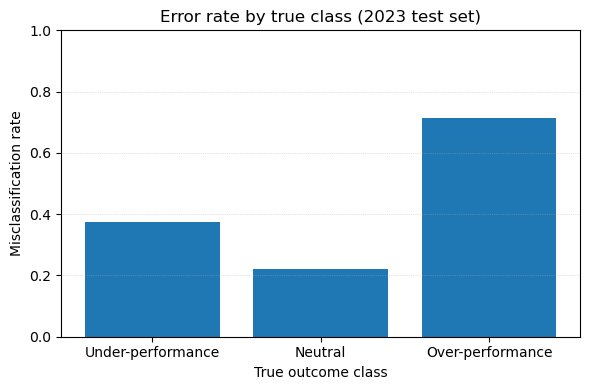

ROOT: /files/DSAP_F1
Saved: /files/DSAP_F1/figures/fig_3_error_rate_by_true_class_2023.pdf
Saved: /files/DSAP_F1/figures/fig_3_error_rate_by_true_class_2023.png


In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Robust project root finder ----------
def find_project_root(start: Path) -> Path:
    start = start.resolve()
    for p in [start] + list(start.parents):
        if (p / "results").is_dir():
            return p
    raise FileNotFoundError(
        f"Could not find project root containing a 'results/' folder from: {start}"
    )

ROOT = find_project_root(Path.cwd())          # works even if cwd == notebooks/
RESULTS = ROOT / "results"
FIGDIR = ROOT / "figures"
FIGDIR.mkdir(exist_ok=True)

CSV_FILE = RESULTS / "error_rate_by_true_class_2023.csv"

OUT_PDF = FIGDIR / "fig_3_error_rate_by_true_class_2023.pdf"
OUT_PNG = FIGDIR / "fig_3_error_rate_by_true_class_2023.png"

# ---------- Load data ----------
df = pd.read_csv(CSV_FILE)

# Map class labels
class_map = {
    0: "Under-performance",
    1: "Neutral",
    2: "Over-performance"
}
df["class_label"] = df["y_true"].map(class_map)

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(6, 4))

ax.bar(df["class_label"], df["error"])

ax.set_ylabel("Misclassification rate")
ax.set_xlabel("True outcome class")
ax.set_title("Error rate by true class (2023 test set)")

ax.set_ylim(0, 1)
ax.grid(axis="y", linestyle=":", linewidth=0.5, alpha=0.7)

fig.tight_layout()
fig.savefig(OUT_PDF, bbox_inches="tight")
fig.savefig(OUT_PNG, dpi=300, bbox_inches="tight")
plt.show()

print("ROOT:", ROOT)
print("Saved:", OUT_PDF)
print("Saved:", OUT_PNG)

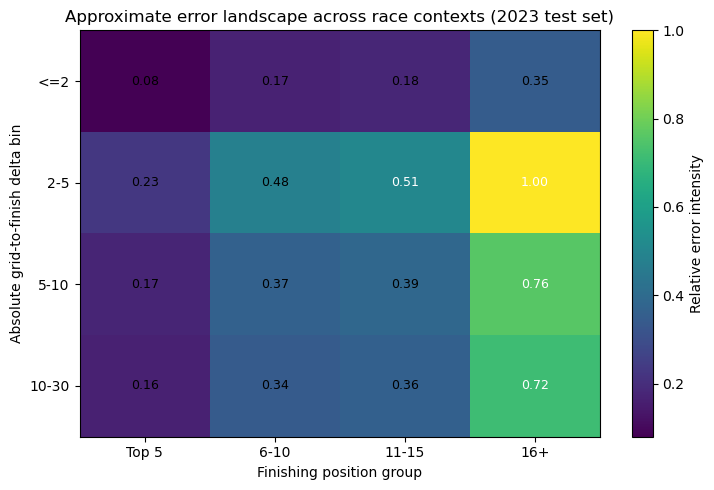

Saved: /files/DSAP_F1/figures/fig_4_error_rate_by_abs_delta_bin_x_by_true_class_2023.pdf
Saved: /files/DSAP_F1/figures/fig_4_error_rate_by_abs_delta_bin_x_by_true_class_2023.png


In [3]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------- Robust project root finder ----------
def find_project_root(start: Path) -> Path:
    start = start.resolve()
    for p in [start] + list(start.parents):
        if (p / "results").is_dir():
            return p
    raise FileNotFoundError("Could not find project root with 'results/'")

ROOT = find_project_root(Path.cwd())
RESULTS = ROOT / "results"
FIGDIR = ROOT / "figures"
FIGDIR.mkdir(exist_ok=True)

# ---------- Load marginal error rates ----------
abs_df = pd.read_csv(RESULTS / "error_rate_by_abs_delta_bin_2023.csv")
finish_df = pd.read_csv(RESULTS / "error_rate_by_finish_group_2023.csv")

# Clean numeric columns (handles '30+,' safely)
abs_df["error"] = pd.to_numeric(abs_df["error"], errors="coerce")
finish_df["error"] = pd.to_numeric(finish_df["error"], errors="coerce")

abs_df = abs_df.dropna(subset=["error"])
finish_df = finish_df.dropna(subset=["error"])

# ---------- Ordering ----------
abs_order = ["<=2", "2-5", "5-10", "10-30", "30+"]
finish_order = ["Top 5", "6-10", "11-15", "16+"]

abs_df["abs_delta_bin"] = pd.Categorical(
    abs_df["abs_delta_bin"], categories=abs_order, ordered=True
)
finish_df["finish_group"] = pd.Categorical(
    finish_df["finish_group"], categories=finish_order, ordered=True
)

abs_df = abs_df.sort_values("abs_delta_bin")
finish_df = finish_df.sort_values("finish_group")

# ---------- Construct approximate joint surface ----------
abs_err = abs_df["error"].to_numpy()
fin_err = finish_df["error"].to_numpy()

heatmap = np.outer(abs_err, fin_err)

# Normalize to [0, 1] for visualization
heatmap = heatmap / np.nanmax(heatmap)

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(7.5, 5))
im = ax.imshow(heatmap, cmap="viridis", aspect="auto")

ax.set_xticks(range(len(finish_df)))
ax.set_yticks(range(len(abs_df)))

ax.set_xticklabels(finish_df["finish_group"].astype(str))
ax.set_yticklabels(abs_df["abs_delta_bin"].astype(str))

ax.set_xlabel("Finishing position group")
ax.set_ylabel("Absolute grid-to-finish delta bin")
ax.set_title(
    "Approximate error landscape across race contexts (2023 test set)"
)

# ---------- Annotate cells with values ----------
for i in range(heatmap.shape[0]):
    for j in range(heatmap.shape[1]):
        value = heatmap[i, j]
        ax.text(
            j,
            i,
            f"{value:.2f}",
            ha="center",
            va="center",
            color="white" if value > 0.5 else "black",
            fontsize=9
        )

# ---------- Colorbar ----------
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Relative error intensity")

# ---------- Save ----------
OUT_PDF = FIGDIR / "fig_4_error_rate_by_abs_delta_bin_x_by_true_class_2023.pdf"
OUT_PNG = FIGDIR / "fig_4_error_rate_by_abs_delta_bin_x_by_true_class_2023.png"

fig.tight_layout()
fig.savefig(OUT_PDF, bbox_inches="tight")
fig.savefig(OUT_PNG, dpi=300, bbox_inches="tight")
plt.show()

print("Saved:", OUT_PDF)
print("Saved:", OUT_PNG)

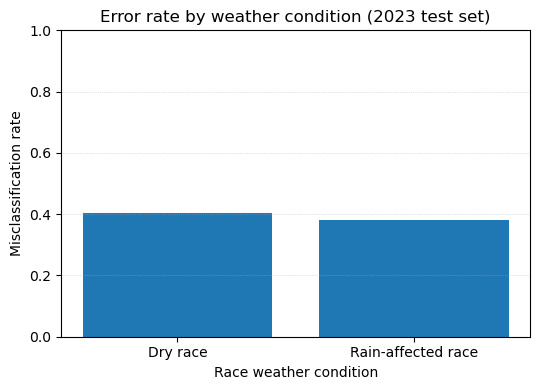

Saved: /files/DSAP_F1/figures/fig_5_error_rate_by_rain_2023.pdf
Saved: /files/DSAP_F1/figures/fig_5_error_rate_by_rain_2023.png


In [4]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Robust project root finder ----------
def find_project_root(start: Path) -> Path:
    start = start.resolve()
    for p in [start] + list(start.parents):
        if (p / "results").is_dir():
            return p
    raise FileNotFoundError("Could not find project root with 'results/'")

ROOT = find_project_root(Path.cwd())
RESULTS = ROOT / "results"
FIGDIR = ROOT / "figures"
FIGDIR.mkdir(exist_ok=True)

# ---------- Input ----------
CSV_FILE = RESULTS / "error_rate_by_rain_2023.csv"

# ---------- Outputs ----------
OUT_PDF = FIGDIR / "fig_5_error_rate_by_rain_2023.pdf"
OUT_PNG = FIGDIR / "fig_5_error_rate_by_rain_2023.png"

# ---------- Load ----------
df = pd.read_csv(CSV_FILE)

# Map rain indicator to labels
rain_map = {
    0: "Dry race",
    1: "Rain-affected race"
}
df["rain_label"] = df["rainfall_any"].map(rain_map)

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(5.5, 4))

ax.bar(
    df["rain_label"],
    df["error"]
)

ax.set_ylabel("Misclassification rate")
ax.set_xlabel("Race weather condition")
ax.set_title("Error rate by weather condition (2023 test set)")

ax.set_ylim(0, 1)
ax.grid(axis="y", linestyle=":", linewidth=0.5, alpha=0.7)

fig.tight_layout()
fig.savefig(OUT_PDF, bbox_inches="tight")
fig.savefig(OUT_PNG, dpi=300, bbox_inches="tight")
plt.show()

print("Saved:", OUT_PDF)
print("Saved:", OUT_PNG)

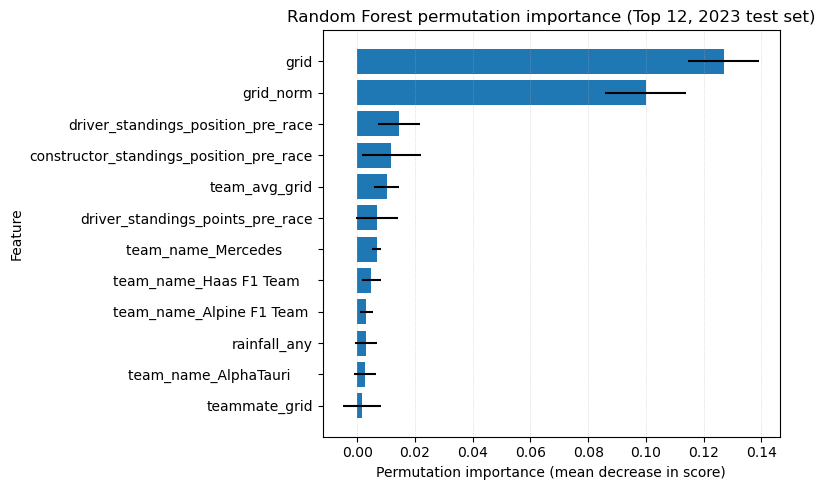

Saved: /files/DSAP_F1/figures/fig_6_rf_permutation_2023.pdf
Saved: /files/DSAP_F1/figures/fig_6_rf_permutation_2023.png


In [5]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Robust project root finder ----------
def find_project_root(start: Path) -> Path:
    start = start.resolve()
    for p in [start] + list(start.parents):
        if (p / "results").is_dir():
            return p
    raise FileNotFoundError("Could not find project root with 'results/'")

ROOT = find_project_root(Path.cwd())
RESULTS = ROOT / "results"
FIGDIR = ROOT / "figures"
FIGDIR.mkdir(exist_ok=True)

CSV_FILE = RESULTS / "rf_permutation_importance_2023_interpretable.csv"

OUT_PDF = FIGDIR / "fig_6_rf_permutation_2023.pdf"
OUT_PNG = FIGDIR / "fig_6_rf_permutation_2023.png"

# ---------- Load ----------
df = pd.read_csv(CSV_FILE)

# Ensure numeric
df["importance_mean"] = pd.to_numeric(df["importance_mean"], errors="coerce")
df["importance_std"] = pd.to_numeric(df["importance_std"], errors="coerce")
df = df.dropna(subset=["importance_mean"])

# Sort by mean importance (descending)
df = df.sort_values("importance_mean", ascending=False)

# Keep a readable top N
TOP_N = 12
plot_df = df.head(TOP_N).copy()

# Reverse for barh (highest at top)
plot_df = plot_df.iloc[::-1]

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(8, 5))

ax.barh(
    plot_df["feature"].astype(str),
    plot_df["importance_mean"],
    xerr=plot_df["importance_std"],
)

ax.set_xlabel("Permutation importance (mean decrease in score)")
ax.set_ylabel("Feature")
ax.set_title(f"Random Forest permutation importance (Top {TOP_N}, 2023 test set)")

ax.grid(axis="x", linestyle=":", linewidth=0.5, alpha=0.7)

fig.tight_layout()
fig.savefig(OUT_PDF, bbox_inches="tight")
fig.savefig(OUT_PNG, dpi=300, bbox_inches="tight")
plt.show()

print("Saved:", OUT_PDF)
print("Saved:", OUT_PNG)

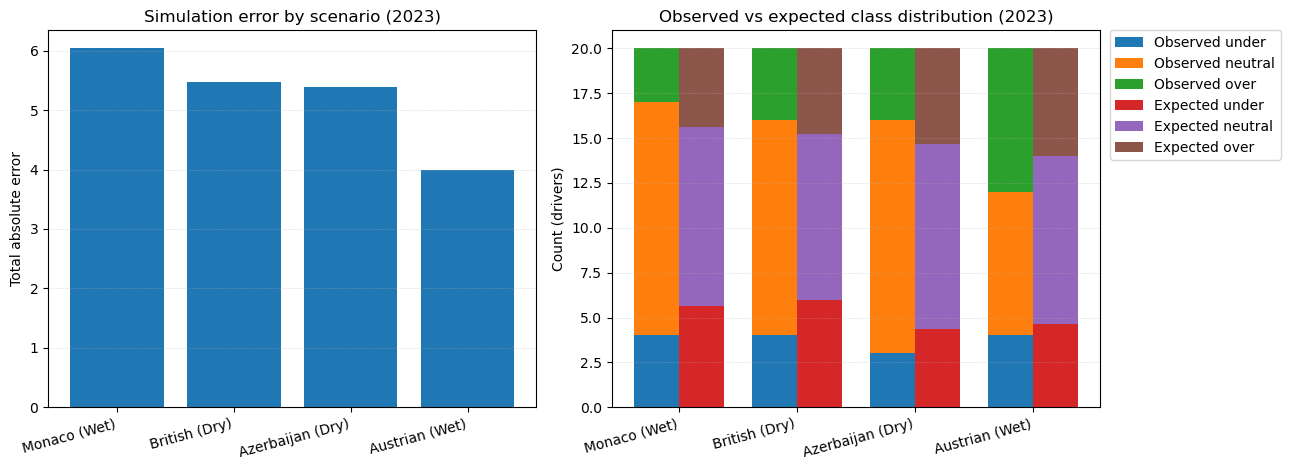

Saved: /files/DSAP_F1/figures/fig_7_simulation_race_summary_2023.pdf
Saved: /files/DSAP_F1/figures/fig_7_simulation_race_summary_2023.png


In [6]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------- Robust project root finder ----------
def find_project_root(start: Path) -> Path:
    start = start.resolve()
    for p in [start] + list(start.parents):
        if (p / "results").is_dir():
            return p
    raise FileNotFoundError("Could not find project root with 'results/'")

ROOT = find_project_root(Path.cwd())
RESULTS = ROOT / "results"
FIGDIR = ROOT / "figures"
FIGDIR.mkdir(exist_ok=True)

CSV_FILE = RESULTS / "simulation_vs_truth_course_2023_with_errors.csv"

OUT_PDF = FIGDIR / "fig_7_simulation_race_summary_2023.pdf"
OUT_PNG = FIGDIR / "fig_7_simulation_race_summary_2023.png"

# ---------- Load ----------
df = pd.read_csv(CSV_FILE)

# Required columns (based on your screenshots)
required = [
    "scenario",
    "observed_under", "observed_neutral", "observed_over",
    "expected_under", "expected_neutral", "expected_over",
    "total_abs_error",
]
missing = [c for c in required if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in {CSV_FILE.name}: {missing}")

# Sort scenarios by error (descending) for the error barplot
df_err = df[["scenario", "total_abs_error"]].copy()
df_err["total_abs_error"] = pd.to_numeric(df_err["total_abs_error"], errors="coerce")
df_err = df_err.dropna(subset=["total_abs_error"]).sort_values("total_abs_error", ascending=False)

# Keep same order for both panels
scenario_order = df_err["scenario"].tolist()
df = df.set_index("scenario").loc[scenario_order].reset_index()

# Optional: shorten scenario labels for readability on x-axis
def pretty_scenario(s: str) -> str:
    # example: monaco_2023_street_wet -> Monaco (wet)
    parts = s.split("_")
    if len(parts) >= 4:
        race = parts[0].capitalize()
        wetdry = parts[-1].capitalize()
        return f"{race} ({wetdry})"
    return s

xlabels = [pretty_scenario(s) for s in df["scenario"].tolist()]
x = np.arange(len(xlabels))

# Values for stacked bars
obs_under = df["observed_under"].to_numpy()
obs_neut  = df["observed_neutral"].to_numpy()
obs_over  = df["observed_over"].to_numpy()

exp_under = df["expected_under"].to_numpy()
exp_neut  = df["expected_neutral"].to_numpy()
exp_over  = df["expected_over"].to_numpy()

# ---------- Plot (2 panels) ----------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4.8))

# Panel 1: Error by scenario
ax1.bar(x, df["total_abs_error"].to_numpy())
ax1.set_xticks(x)
ax1.set_xticklabels(xlabels, rotation=15, ha="right")
ax1.set_ylabel("Total absolute error")
ax1.set_title("Simulation error by scenario (2023)")
ax1.grid(axis="y", linestyle=":", linewidth=0.5, alpha=0.7)

# Panel 2: Observed vs Expected distributions (stacked)
w = 0.38
x_obs = x - w/2
x_exp = x + w/2

# Observed stacks
ax2.bar(x_obs, obs_under, width=w, label="Observed under")
ax2.bar(x_obs, obs_neut,  width=w, bottom=obs_under, label="Observed neutral")
ax2.bar(x_obs, obs_over,  width=w, bottom=obs_under + obs_neut, label="Observed over")

# Expected stacks
ax2.bar(x_exp, exp_under, width=w, label="Expected under")
ax2.bar(x_exp, exp_neut,  width=w, bottom=exp_under, label="Expected neutral")
ax2.bar(x_exp, exp_over,  width=w, bottom=exp_under + exp_neut, label="Expected over")

ax2.set_xticks(x)
ax2.set_xticklabels(xlabels, rotation=15, ha="right")
ax2.set_ylabel("Count (drivers)")
ax2.set_title("Observed vs expected class distribution (2023)")
ax2.grid(axis="y", linestyle=":", linewidth=0.5, alpha=0.7)

# Compact legend outside the plot area (avoids clutter)
ax2.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0), borderaxespad=0)

fig.tight_layout()
fig.savefig(OUT_PDF, bbox_inches="tight")
fig.savefig(OUT_PNG, dpi=300, bbox_inches="tight")
plt.show()

print("Saved:", OUT_PDF)
print("Saved:", OUT_PNG)

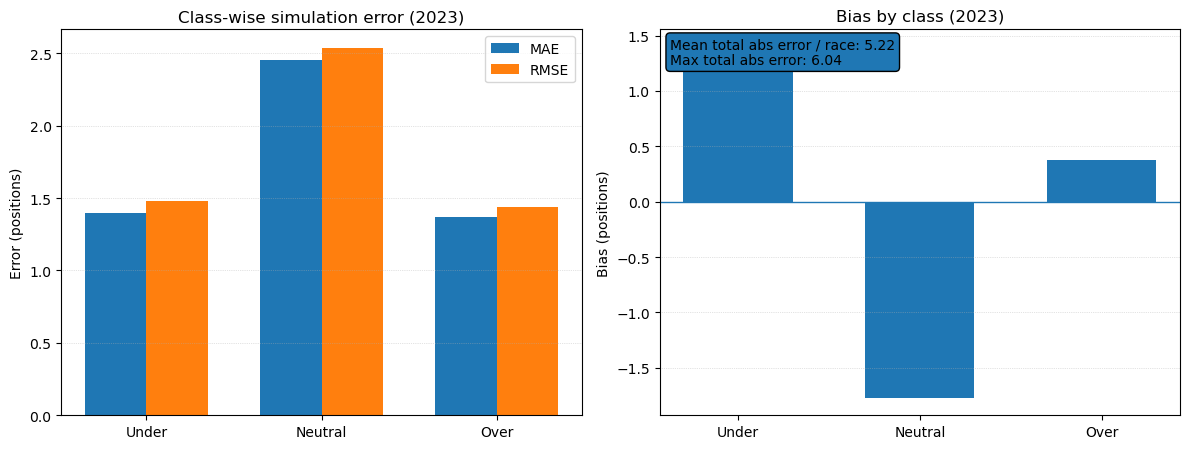

Saved: /files/DSAP_F1/figures/fig_8_simulation_error_summary_2023.pdf
Saved: /files/DSAP_F1/figures/fig_8_simulation_error_summary_2023.png


In [7]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------- Robust project root finder ----------
def find_project_root(start: Path) -> Path:
    start = start.resolve()
    for p in [start] + list(start.parents):
        if (p / "results").is_dir():
            return p
    raise FileNotFoundError("Could not find project root with 'results/'")

ROOT = find_project_root(Path.cwd())
RESULTS = ROOT / "results"
FIGDIR = ROOT / "figures"
FIGDIR.mkdir(exist_ok=True)

CSV_FILE = RESULTS / "simulation_error_summary_2023.csv"

OUT_PDF = FIGDIR / "fig_8_simulation_error_summary_2023.pdf"
OUT_PNG = FIGDIR / "fig_8_simulation_error_summary_2023.png"

# ---------- Load ----------
df = pd.read_csv(CSV_FILE)
if not {"metric", "value"}.issubset(df.columns):
    raise ValueError("Expected columns: metric, value")

df["value"] = pd.to_numeric(df["value"], errors="coerce")
df = df.dropna(subset=["value"]).copy()

# Helper to fetch values safely
def getv(name, default=np.nan):
    s = df.loc[df["metric"] == name, "value"]
    return float(s.iloc[0]) if len(s) else default

# Class-wise metrics
classes = ["under", "neutral", "over"]
mae = [getv(f"MAE_{c}") for c in classes]
rmse = [getv(f"RMSE_{c}") for c in classes]
bias = [getv(f"Bias_mean_delta_{c}") for c in classes]

# Global metrics
mean_total = getv("mean_total_abs_error_per_race")
max_total = getv("max_total_abs_error")

# ---------- Plot: 2 panels (readable; avoids mixing scales blindly) ----------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.6))

x = np.arange(len(classes))
w = 0.35

# Panel 1: MAE vs RMSE by class
ax1.bar(x - w/2, mae, width=w, label="MAE")
ax1.bar(x + w/2, rmse, width=w, label="RMSE")
ax1.set_xticks(x)
ax1.set_xticklabels([c.capitalize() for c in classes])
ax1.set_ylabel("Error (positions)")
ax1.set_title("Class-wise simulation error (2023)")
ax1.grid(axis="y", linestyle=":", linewidth=0.5, alpha=0.7)
ax1.legend()

# Panel 2: Bias by class + global totals as reference bars
ax2.bar(x, bias, width=0.6, label="Bias (mean delta)")
ax2.axhline(0, linewidth=1)

# Add global metrics as text box (cleaner than mixing scales on same axis)
txt_lines = []
if not np.isnan(mean_total): txt_lines.append(f"Mean total abs error / race: {mean_total:.2f}")
if not np.isnan(max_total):  txt_lines.append(f"Max total abs error: {max_total:.2f}")
if txt_lines:
    ax2.text(
        0.02, 0.98,
        "\n".join(txt_lines),
        transform=ax2.transAxes,
        va="top",
        ha="left",
        fontsize=10,
        bbox=dict(boxstyle="round", pad=0.3)
    )

ax2.set_xticks(x)
ax2.set_xticklabels([c.capitalize() for c in classes])
ax2.set_ylabel("Bias (positions)")
ax2.set_title("Bias by class (2023)")
ax2.grid(axis="y", linestyle=":", linewidth=0.5, alpha=0.7)

fig.tight_layout()
fig.savefig(OUT_PDF, bbox_inches="tight")
fig.savefig(OUT_PNG, dpi=300, bbox_inches="tight")
plt.show()

print("Saved:", OUT_PDF)
print("Saved:", OUT_PNG)

/tmp/ipykernel_613/2806128535.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("p_over_bin")


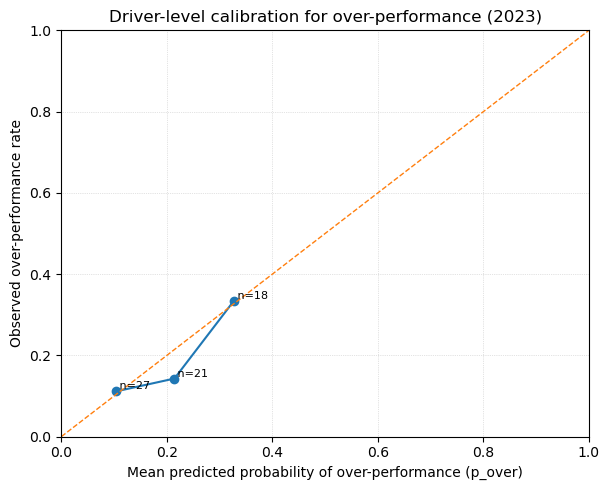

Saved: /files/DSAP_F1/figures/fig_9_simulation_vs_truth_driver_2023.pdf
Saved: /files/DSAP_F1/figures/fig_9_simulation_vs_truth_driver_2023.png
Bins kept (n >= 10): 3


In [8]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------- Robust project root finder ----------
def find_project_root(start: Path) -> Path:
    start = start.resolve()
    for p in [start] + list(start.parents):
        if (p / "results").is_dir():
            return p
    raise FileNotFoundError("Could not find project root with 'results/'")

ROOT = find_project_root(Path.cwd())
RESULTS = ROOT / "results"
FIGDIR = ROOT / "figures"
FIGDIR.mkdir(exist_ok=True)

CSV_FILE = RESULTS / "simulation_vs_truth_driver_2023.csv"

OUT_PDF = FIGDIR / "fig_9_simulation_vs_truth_driver_2023.pdf"
OUT_PNG = FIGDIR / "fig_9_simulation_vs_truth_driver_2023.png"

# ---------- Load ----------
df = pd.read_csv(CSV_FILE)

# Required columns (based on your header)
required = ["p_over", "label"]
missing = [c for c in required if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in driver CSV: {missing}. Found: {list(df.columns)}")

df["p_over"] = pd.to_numeric(df["p_over"], errors="coerce")
df["label"] = pd.to_numeric(df["label"], errors="coerce")
df = df.dropna(subset=["p_over", "label"]).copy()

# Define true over-performance as label == 2 (as in your project)
df["is_over"] = (df["label"] == 2).astype(int)

# ---------- Bin p_over and compute observed rate ----------
n_bins = 6  # small -> stable in appendix
df["p_over_bin"] = pd.cut(df["p_over"], bins=n_bins)

cal = (
    df.groupby("p_over_bin")
      .agg(
          n=("is_over", "size"),
          mean_p_over=("p_over", "mean"),
          observed_over_rate=("is_over", "mean"),
      )
      .reset_index()
)

# Drop bins with too few samples (avoid misleading points)
MIN_N = 10
cal = cal[cal["n"] >= MIN_N].copy()

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(6.2, 5))

# reliability curve points
ax.plot(cal["mean_p_over"], cal["observed_over_rate"], marker="o", linewidth=1.5)

# perfect calibration line
ax.plot([0, 1], [0, 1], linestyle="--", linewidth=1)

ax.set_xlabel("Mean predicted probability of over-performance (p_over)")
ax.set_ylabel("Observed over-performance rate")
ax.set_title("Driver-level calibration for over-performance (2023)")

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.grid(True, linestyle=":", linewidth=0.5, alpha=0.7)

# annotate n per bin (small, helpful)
for _, r in cal.iterrows():
    ax.text(r["mean_p_over"], r["observed_over_rate"], f" n={int(r['n'])}", fontsize=8, ha="left", va="bottom")

fig.tight_layout()
fig.savefig(OUT_PDF, bbox_inches="tight")
fig.savefig(OUT_PNG, dpi=300, bbox_inches="tight")
plt.show()

print("Saved:", OUT_PDF)
print("Saved:", OUT_PNG)
print("Bins kept (n >= %d): %d" % (MIN_N, len(cal)))